<a href="https://colab.research.google.com/github/BryanFranklinSS/TCC---Trainable-segmentation-using-local-features-and-random-forests/blob/main/trainable_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

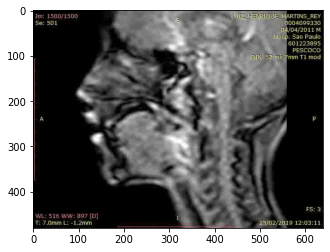

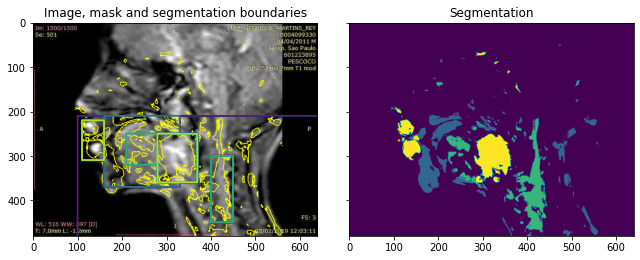

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data, segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial

full_img = mpimg.imread('frame1500.jpg')

img = full_img[:900, :900]

imgplot = plt.imshow(img)
plt.show()

# Build an array of labels for training the segmentation.
# Here we use rectangles but visualization libraries such as plotly
# (and napari?) can be used to draw a mask on the image.
training_labels = np.zeros(img.shape[:2], dtype=np.uint8)
training_labels[:210] = 1 #line
training_labels[:500, :100] = 1
training_labels[:200, 550:] = 1

training_labels[210:370, 160:330] = 2
training_labels[250:320, 210:280] = 3

training_labels[250:360, 280:370] = 4 
training_labels[220:310, 110:160] = 4

training_labels[300:450, 400:450] = 3


sigma_min = 1
sigma_max = 16
features_func = partial(feature.multiscale_basic_features,
                        intensity=True, multichannel=True, edges=True, texture=False,
                        sigma_min=sigma_min, sigma_max=sigma_max)
features = features_func(img)
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1,
                             max_depth=10, max_samples=0.5)
clf = future.fit_segmenter(training_labels, features, clf)
result = future.predict_segmenter(features, clf)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))
ax[0].imshow(segmentation.mark_boundaries(img, result, mode='thick'))
ax[0].contour(training_labels)
ax[0].set_title('Image, mask and segmentation boundaries')
ax[1].imshow(result)
ax[1].set_title('Segmentation')
fig.tight_layout()